# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# read data

runs 20,000-30,000

sims0 = pd.read_csv( '/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs20000to30000_NsigmaT_10_NSigmaZa1_5_NSigmaZa2_8_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 50,000 to 68,746

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs50000to68746_NsigmaT_15_NSigmaZa1_10_NSigmaZa2_5_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

In [23]:
def draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='',
                                    bins=50,
                                    legend_loc='bbox',
                                    do_fit_gaussian=True,
                                    x_range = None,
                                    y_range = None,
                                    xtext = None , ytext=None):
    
    weights=[sims.run/sims.run,sims['Pval'+var+'_unweighted'],sims.PvalTotal_unweighted,sims.KSxPval_avg]
    weighting_labels=['generated','$Pval$ weighted','$Pval_{tot}$ weighted','$KS_{tot}$ weighted']
    histograms , bins = plot_1d_withoutandwithweight(sims['gen'+var],
                                                     weights=weights,
                                                     weighting_labels = weighting_labels,
                                                     bins=bins,
                                                     legend_loc=legend_loc,
                                                     fontsize=20,
                                                     xlabel=xlabel,
                                                     x_range=x_range,                                                    
                                                     y_range=y_range);
    do_show_gaussians = [False , True , True , False]
    
    for hw,weight,weighting_label,do_show_gaussian in zip(histograms,weights,weighting_labels,do_show_gaussians):
        mu = np.average(sims['gen'+var] , weights=weight)
        variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
        sigma = np.sqrt(variance)
                                                                           
        if do_fit_gaussian and do_show_gaussian:
            x = np.linspace(bins.min(),bins.max(),100)
            y = mlab.normpdf( x, mu, sigma) # bins
            ynormed = y*(hw.max()/y.max())
            plt.plot(x, ynormed, '--', linewidth=2)
        print weighting_label + ': \n mean=%.3f , stdev=%.3f'%(mu,sigma)
        
    
def draw_PvalWeighting_2d( df , v1 , v2 , bins=40 , weights=None , cmap='Greys' ,
                          xlabel=None,ylabel=None ,
                         figsize=(10,10),title=None):
    fig,ax=plt.subplots(figsize=figsize)
    plt.hist2d(df[v1],df[v2],bins=bins,weights=weights,cmap=cmap);
    plt.colorbar()
    set_axes( ax , xlabel , ylabel )
    ax.set_title(title)
    
    
def draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2' ,
                              xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                              bins=40,
                              figsize=(10,10),
                              weights=None,
                              cmaps=None):
    
    for weight,cmap in zip(weights,cmaps):
        print weight , cmap
        title=weight
        weight=sims[weight] if weight is not None else None
        draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight  , cmap=cmap ,
                              xlabel=xlabel,ylabel=ylabel, figsize=figsize , title=title);


# histograms of generated, and generated+weighted

generated: 
 mean=0.160 , stdev=0.032
$Pval$ weighted: 
 mean=0.156 , stdev=0.009
$Pval_{tot}$ weighted: 
 mean=0.155 , stdev=0.012
$KS_{tot}$ weighted: 
 mean=0.163 , stdev=0.020


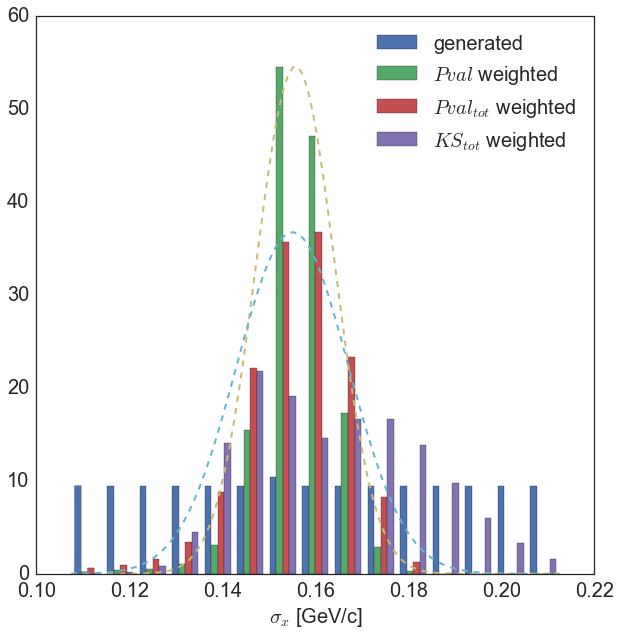

In [22]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=15)

generated: 
 mean=0.160 , stdev=0.032
$Pval$ weighted: 
 mean=0.161 , stdev=0.012
$Pval_{tot}$ weighted: 
 mean=0.155 , stdev=0.012
$KS_{tot}$ weighted: 
 mean=0.163 , stdev=0.020


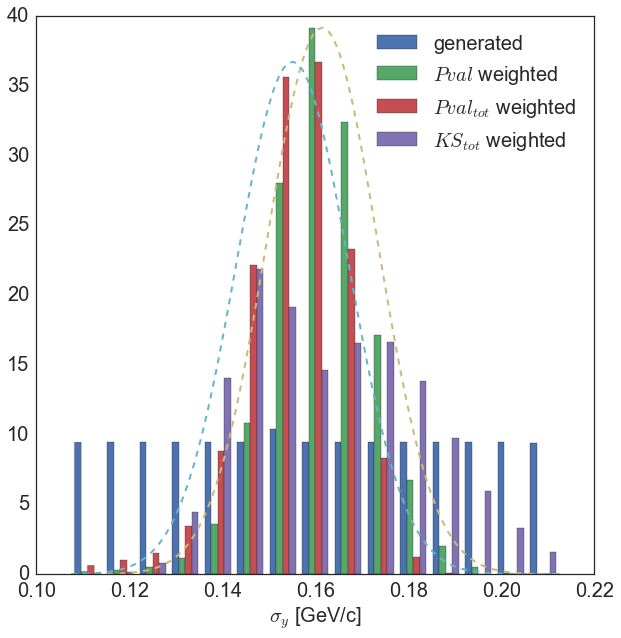

In [25]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=15)

generated: 
 mean=0.653 , stdev=0.444
$Pval$ weighted: 
 mean=0.541 , stdev=0.329
$Pval_{tot}$ weighted: 
 mean=0.206 , stdev=0.206
$KS_{tot}$ weighted: 
 mean=0.682 , stdev=0.439


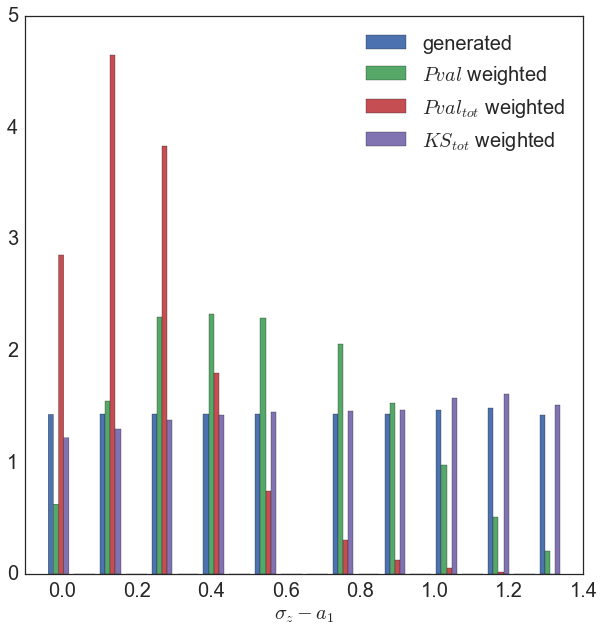

In [32]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-0.1,1.4),xtext=0.23)

generated: 
 mean=0.089 , stdev=0.042
$Pval$ weighted: 
 mean=0.074 , stdev=0.039
$Pval_{tot}$ weighted: 
 mean=0.069 , stdev=0.037
$KS_{tot}$ weighted: 
 mean=0.090 , stdev=0.042


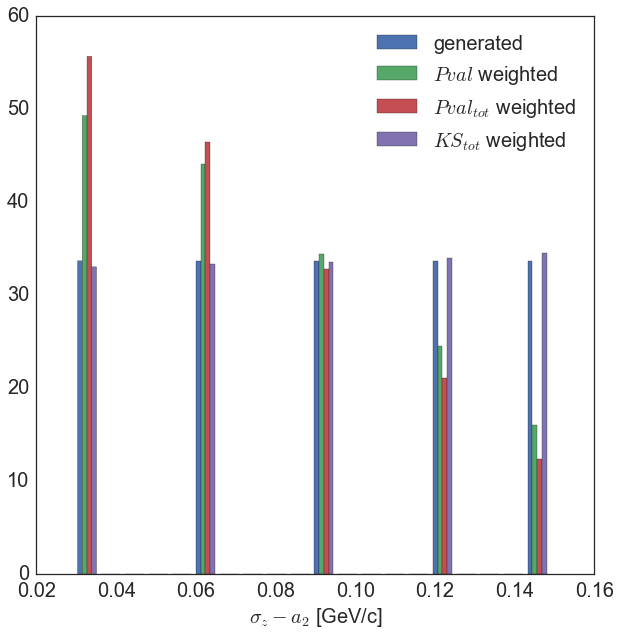

In [33]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,do_fit_gaussian=False)

generated: 
 mean=0.603 , stdev=0.142
$Pval$ weighted: 
 mean=0.597 , stdev=0.137
$Pval_{tot}$ weighted: 
 mean=0.619 , stdev=0.134
$KS_{tot}$ weighted: 
 mean=0.596 , stdev=0.142


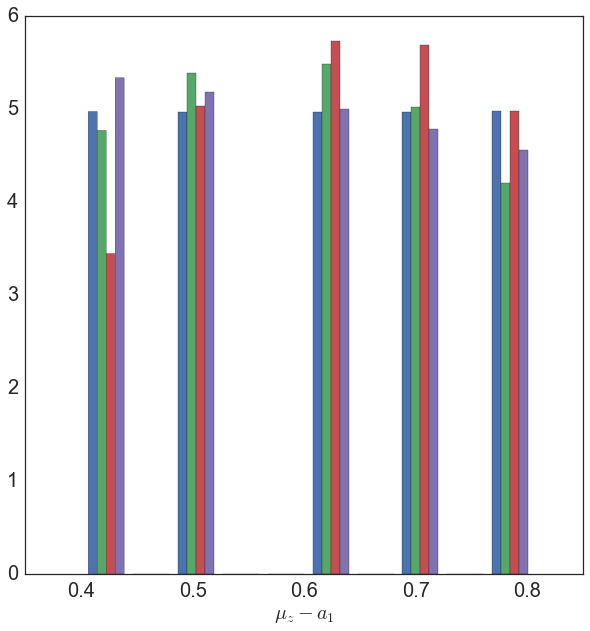

In [12]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.35,0.85),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

generated: 
 mean=-0.213 , stdev=0.082
$Pval$ weighted: 
 mean=-0.162 , stdev=0.064
$Pval_{tot}$ weighted: 
 mean=-0.180 , stdev=0.072
$KS_{tot}$ weighted: 
 mean=-0.220 , stdev=0.081


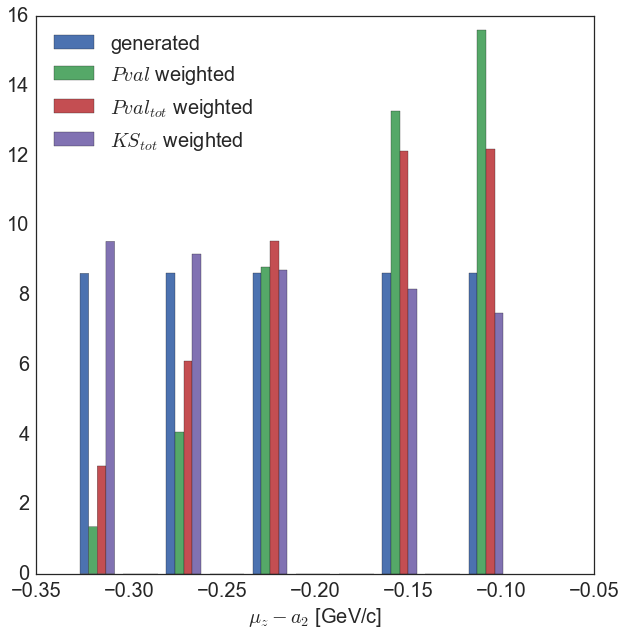

In [56]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$ [GeV/c]',
                                bins=10,legend_loc='upper left',xtext=-0.34,ytext=0.23,do_fit_gaussian=False)

# runs 100,000 to 200,7999

In [3]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs100000to200799_NsigmaT_10_NSigmaZa1_10_NSigmaZa2_10_NMeanZa1_10_NMeanZa2_10_NRand_10_simulationruns_results.csv')

generated: 
 mean=0.160 , stdev=0.031
$Pval$ weighted: 
 mean=0.158 , stdev=0.013
$Pval_{tot}$ weighted: 
 mean=0.155 , stdev=0.015
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan
generated: 
 mean=0.160 , stdev=0.031
$Pval$ weighted: 
 mean=0.163 , stdev=0.016
$Pval_{tot}$ weighted: 
 mean=0.155 , stdev=0.015
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan


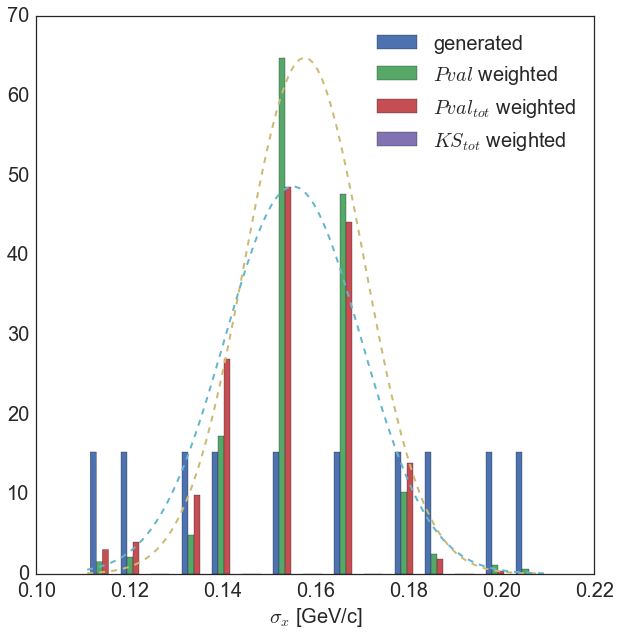

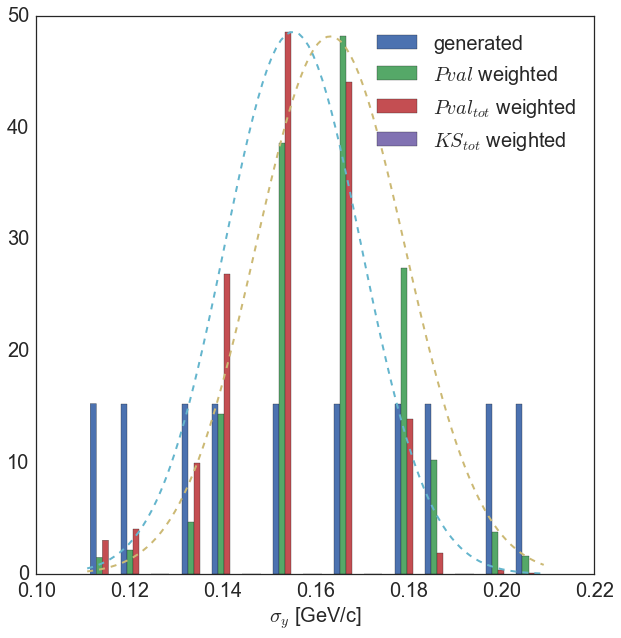

In [4]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=15)
draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=15)

generated: 
 mean=0.750 , stdev=0.862
$Pval$ weighted: 
 mean=0.510 , stdev=0.753
$Pval_{tot}$ weighted: 
 mean=0.172 , stdev=0.547
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan
generated: 
 mean=-0.050 , stdev=0.131
$Pval$ weighted: 
 mean=-0.047 , stdev=0.120
$Pval_{tot}$ weighted: 
 mean=-0.035 , stdev=0.113
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan


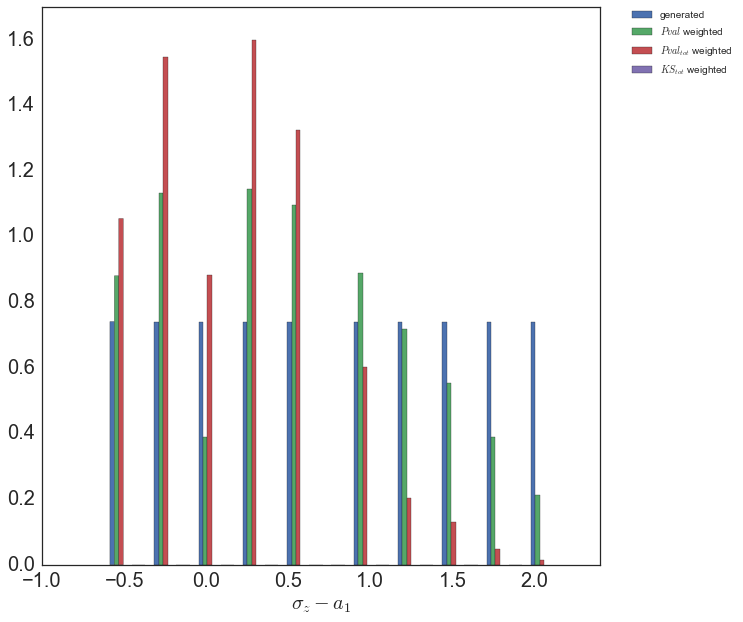

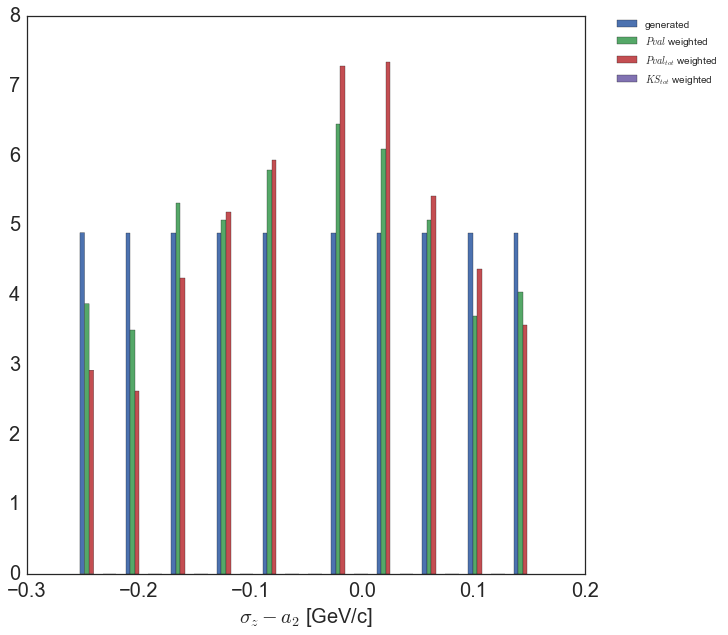

In [4]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.3,0.2),do_fit_gaussian=False)

# runs 300,000 to 460,000

In [3]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_NsigmaT_1_NSigmaZa1_20_NSigmaZa2_20_NMeanZa1_20_NMeanZa2_20_NRand_10_simulationruns_results.csv')



sum up Pval for only two variables at a time

In [11]:
PvalMeanZa1MeanZa2 , PvalSigmaZa1SigmaZa2 , PvalSigmaZa1MeanZa2 , PvalSigmaZa2MeanZa1 , PvalSigmaZa1MeanZa1 , PvalSigmaZa2MeanZa2 = [] , [] , [] , [], [], []
for index, row in sims.iterrows():
    if index%10000==0 : print index
    PvalSigmaZa1SigmaZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalSigmaZa2_unweighted ] ) ) 
    PvalMeanZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalMeanZa1_unweighted , row.PvalMeanZa2_unweighted ] ) ) 
    
    PvalSigmaZa1MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa1_unweighted ] ) )    
    PvalSigmaZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa2_unweighted ] ) )
    
    PvalSigmaZa2MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa1_unweighted ] ) )
    PvalSigmaZa2MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa2_unweighted ] ) )
print 'done.'

 
0 
0.00216919076542 0.0266285185842 0.00088606114268 3.06277724729e-07 
10000 
0.25528431864 0.000272346466576 0.157300395502 1.05317173535e-12 
20000 
0.000744391904593 0.00149380242284 9.26868709881e-06 1.96474156101e-11 
30000 
7.90211320182e-14 0.00108497708596 7.10184547253e-24 1.65653715153e-11 
40000 
0.492584439674 0.13259600316 0.157767443038 0.137960178693 
50000 
0.232587572022 0.000140477473891 0.0381818988487 1.05019517821e-12 
60000 
0.123809377632 0.0139974457146 0.154138095573 0.0397073358907 
70000 
0.000484335374686 2.64513522934e-05 4.38711238521e-05 1.06279744059e-13 
80000 
0.448326433321 0.000357937789598 0.154805235966 0.00148478469779 
90000 
0.0206813974275 0.00186291246169 0.00228511217503 1.79107647637e-11 
100000 
0.0183525842307 0.000224579317292 0.286249032181 7.6143767947e-11 
110000 
0.255409948336 0.000540577725057 0.288806357129 9.32071459332e-11 
120000 
0.074252661033 0.00143764217923 0.105531882684 0.0543449436356 
130000 
0.363475729087 0.0379665

In [12]:
sims['PvalSigmaZa1SigmaZa2'] = PvalSigmaZa1SigmaZa2
sims['PvalMeanZa1MeanZa2'] = PvalMeanZa1MeanZa2
sims['PvalSigmaZa1MeanZa1'] = PvalSigmaZa1MeanZa1
sims['PvalSigmaZa1MeanZa2'] = PvalSigmaZa1MeanZa2
sims['PvalSigmaZa2MeanZa1'] = PvalSigmaZa2MeanZa1
sims['PvalSigmaZa2MeanZa2'] = PvalSigmaZa2MeanZa2

In [4]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_1sT_20sZa1_20sZa2_20mZa1_20mZa2_10r_results.csv')

generated: 
 mean=0.155 , stdev=0.000
$Pval$ weighted: 
 mean=0.155 , stdev=0.000
$Pval_{tot}$ weighted: 
 mean=0.155 , stdev=0.000
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan
generated: 
 mean=0.155 , stdev=0.000
$Pval$ weighted: 
 mean=0.155 , stdev=0.000
$Pval_{tot}$ weighted: 
 mean=0.155 , stdev=0.000
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan


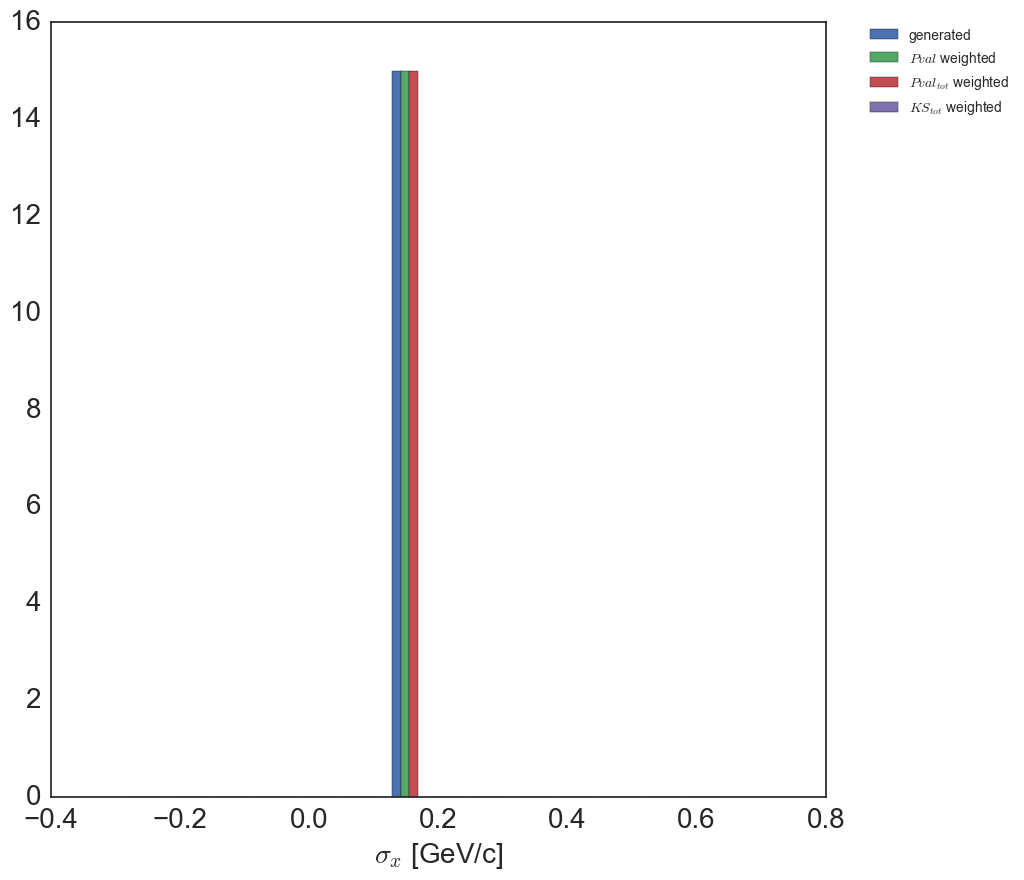

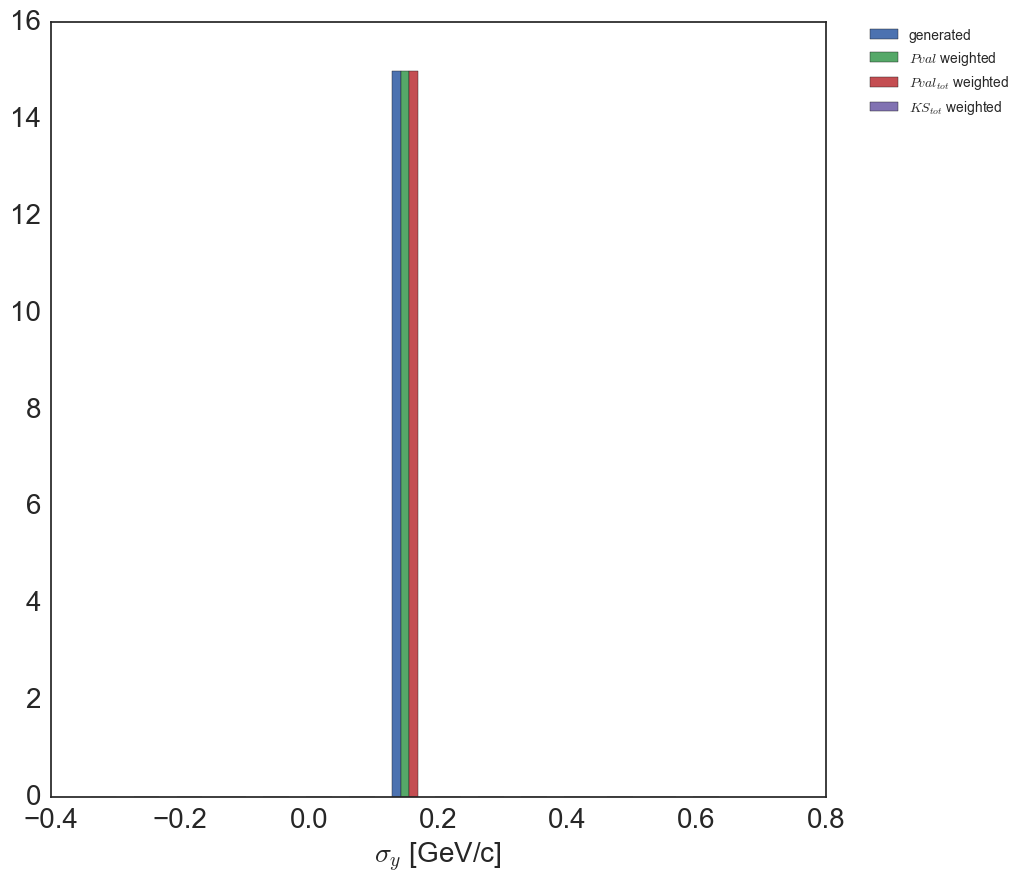

In [5]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=15)
draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=15)

generated: 
 mean=1.200 , stdev=0.659
$Pval$ weighted: 
 mean=0.937 , stdev=0.592
$Pval_{tot}$ weighted: 
 mean=0.781 , stdev=0.483
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan
generated: 
 mean=-0.000 , stdev=0.275
$Pval$ weighted: 
 mean=-0.186 , stdev=0.168
$Pval_{tot}$ weighted: 
 mean=-0.147 , stdev=0.167
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan


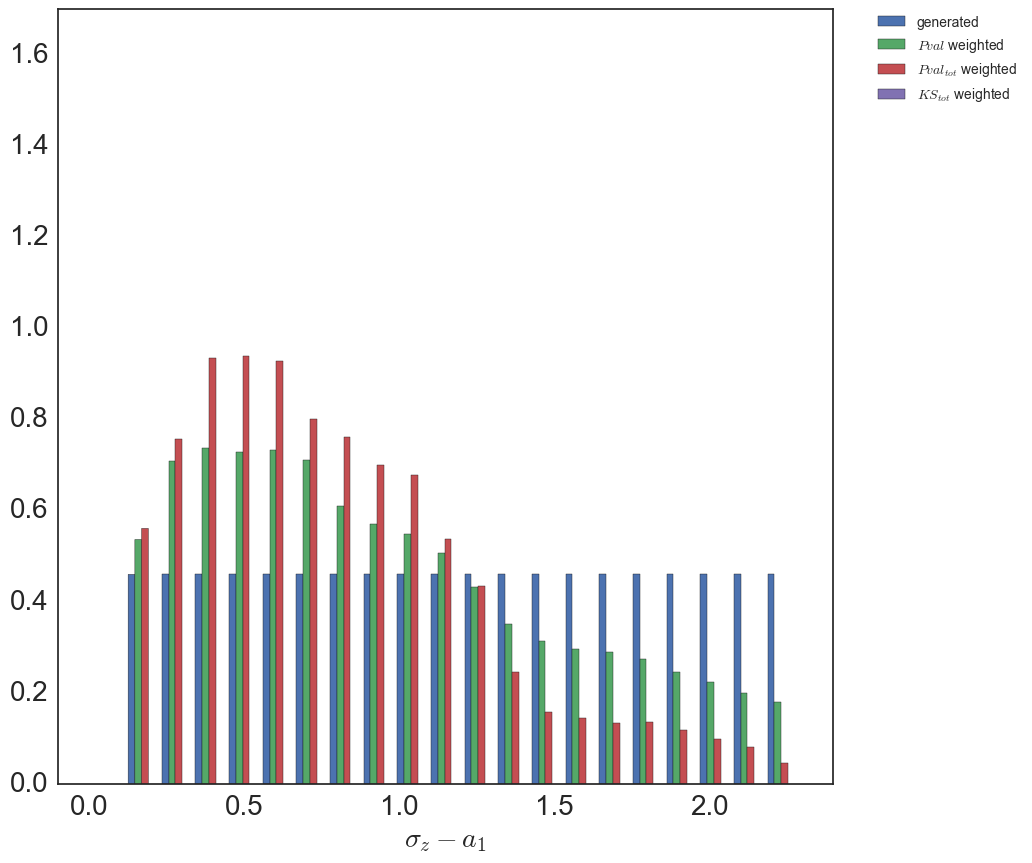

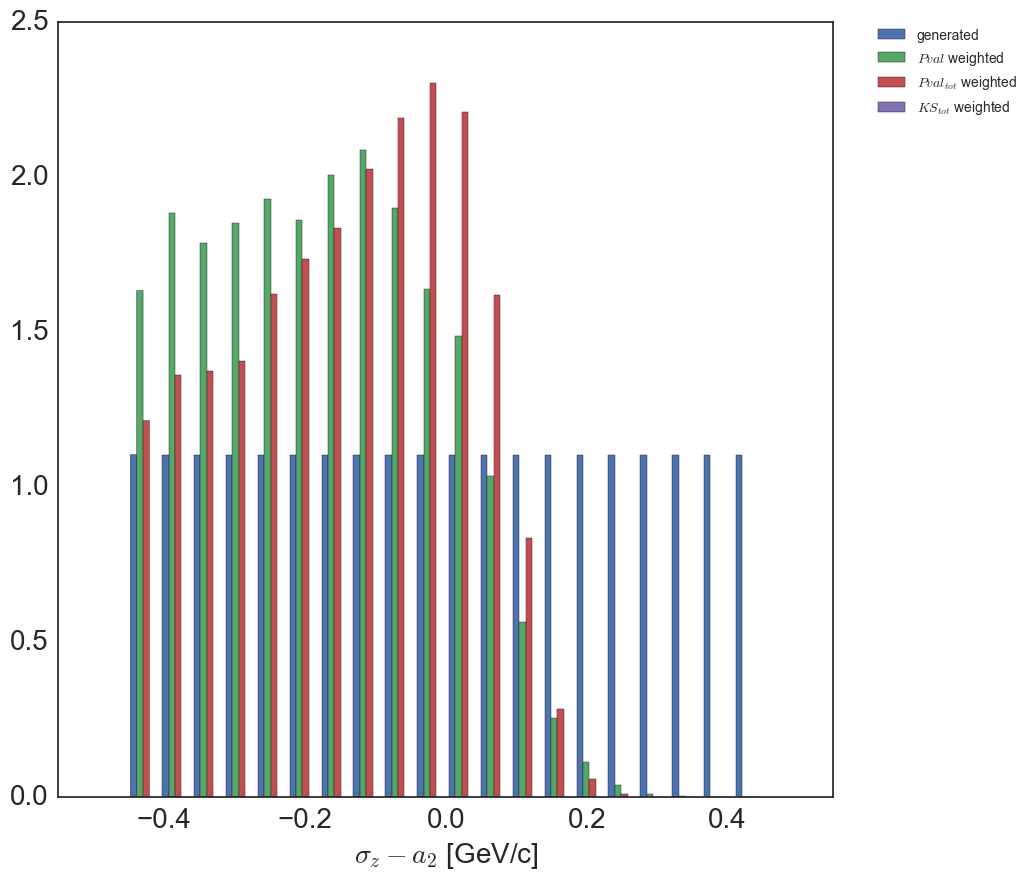

In [7]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-.1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.55,0.55),do_fit_gaussian=False)

generated: 
 mean=0.600 , stdev=0.330
$Pval$ weighted: 
 mean=0.553 , stdev=0.319
$Pval_{tot}$ weighted: 
 mean=0.585 , stdev=0.298
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan
generated: 
 mean=-0.000 , stdev=0.275
$Pval$ weighted: 
 mean=-0.144 , stdev=0.171
$Pval_{tot}$ weighted: 
 mean=-0.179 , stdev=0.144
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan


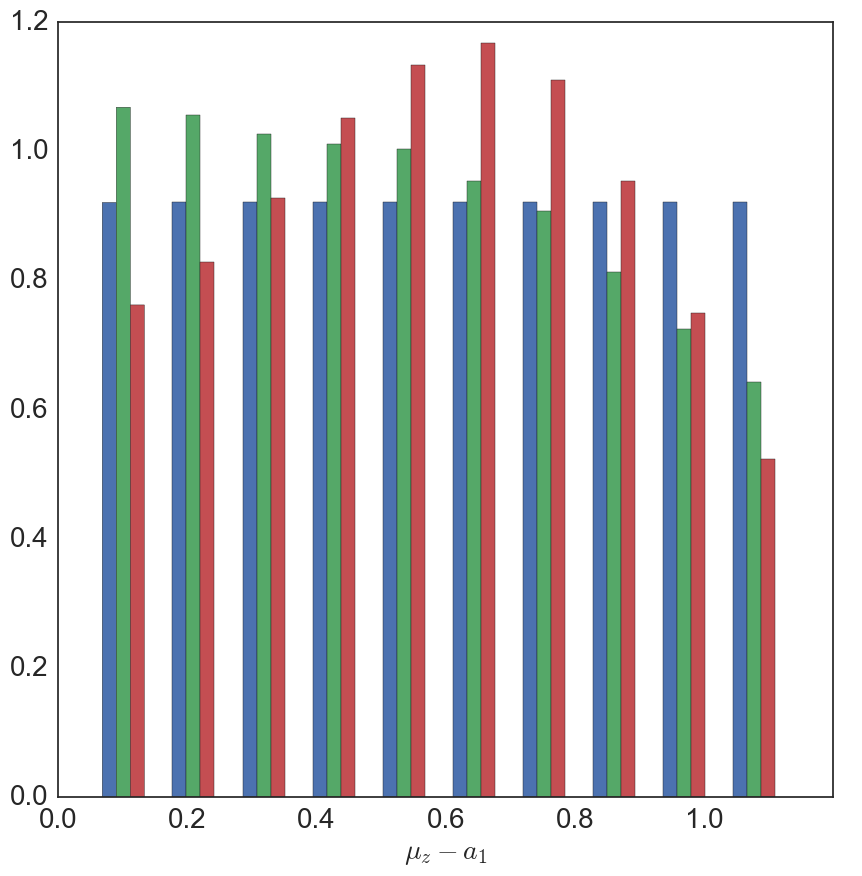

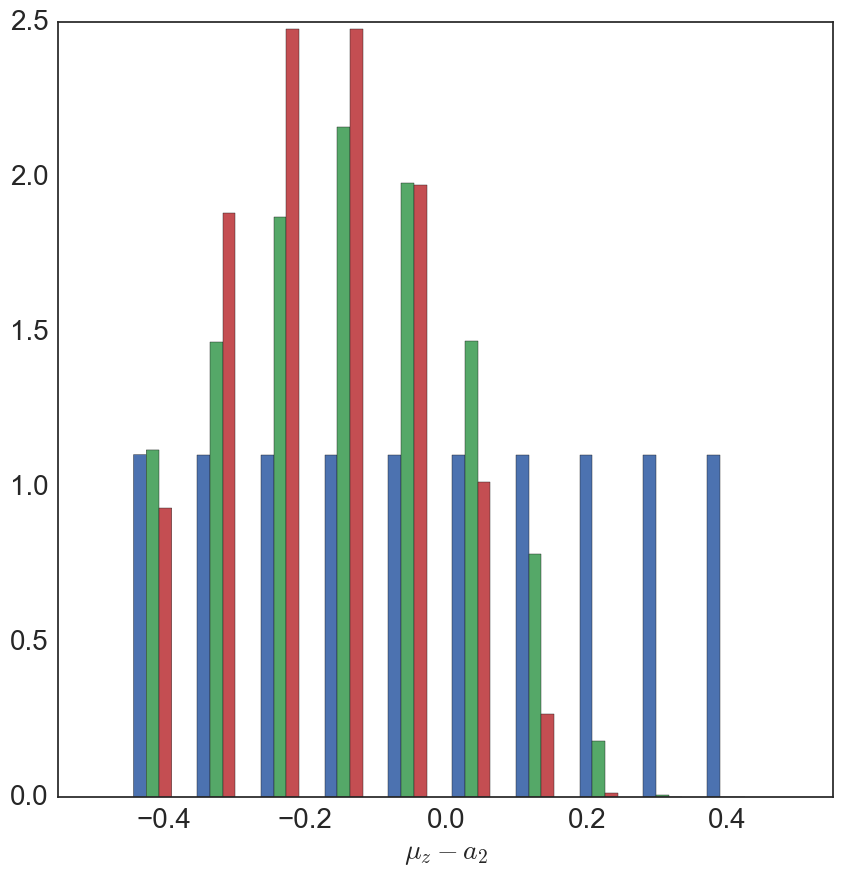

In [24]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.,1.2),xtext=0.82,do_fit_gaussian=False,legend_loc='none')
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$',
                                bins=10,x_range=(-0.55,0.55),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

In [21]:
cmaps = ['Blues' , 'Reds' , 'Greens' , 'Purples']

None Blues
PvalSigmaZa1SigmaZa2 Reds
PvalTotal_unweighted Greens
KStPval_avg Purples


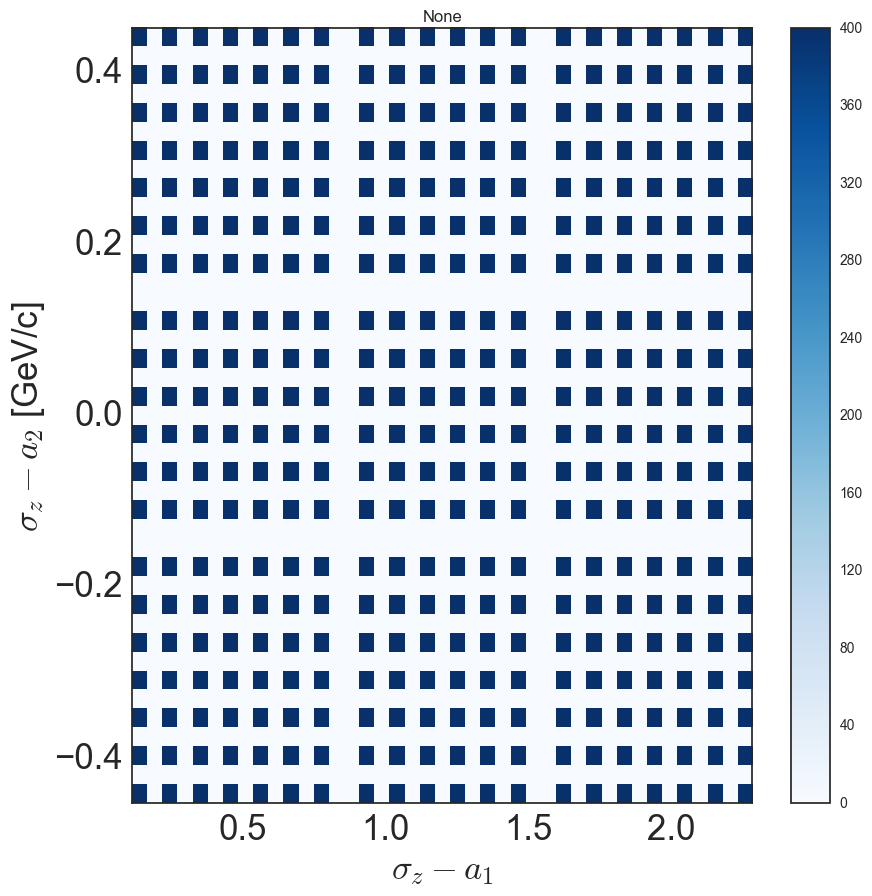

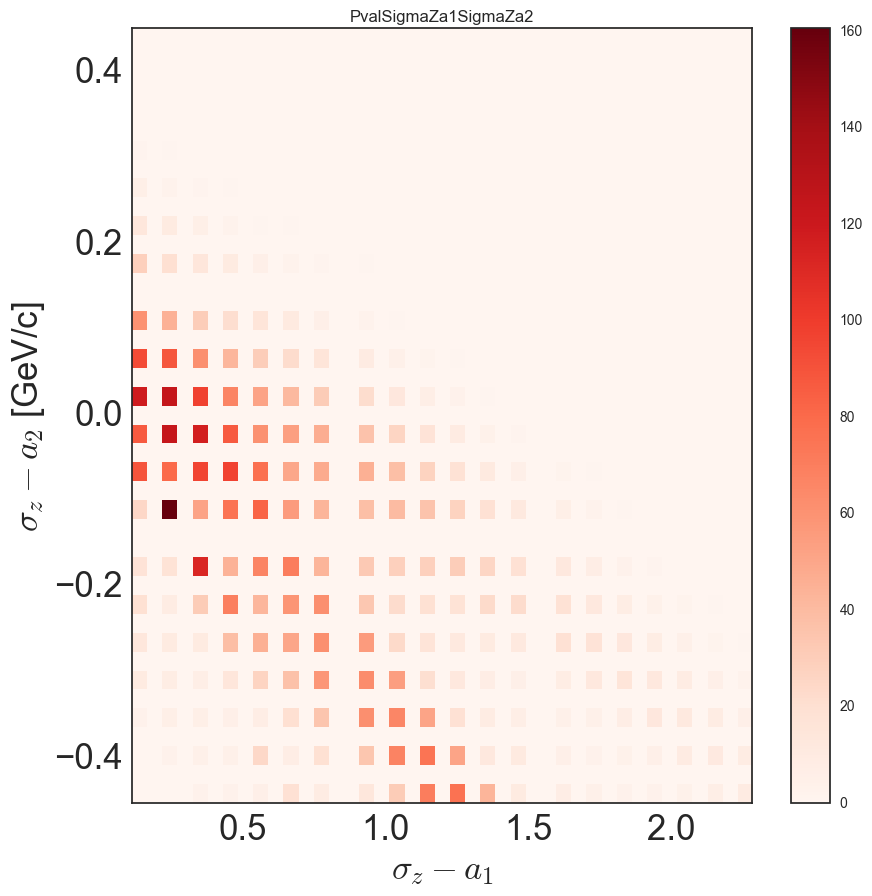

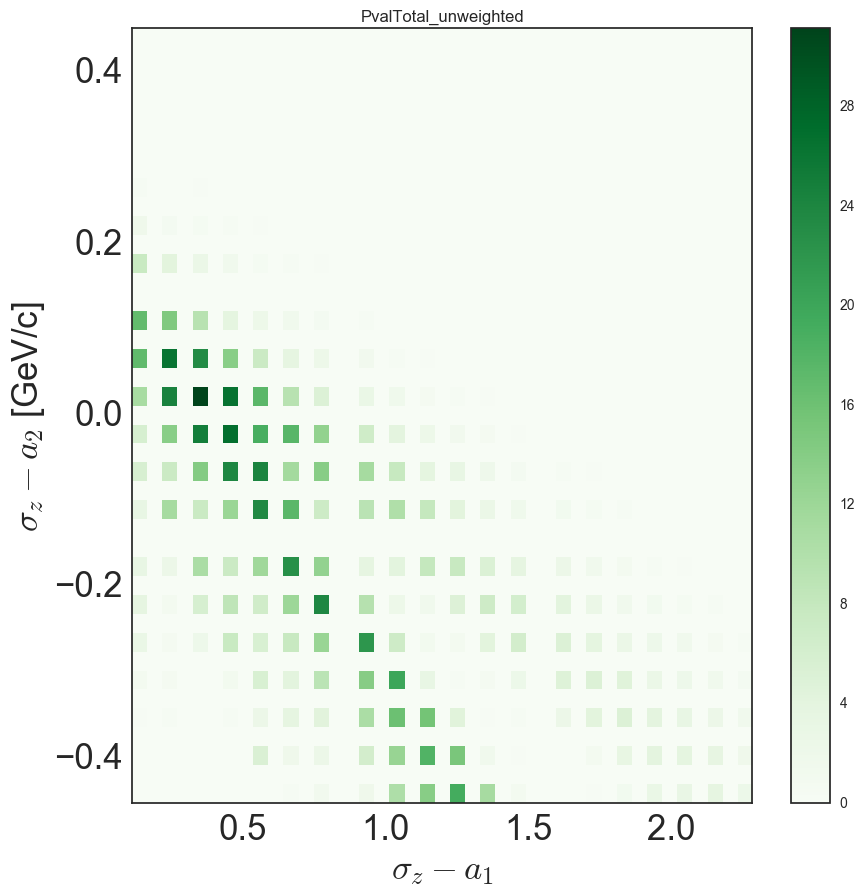

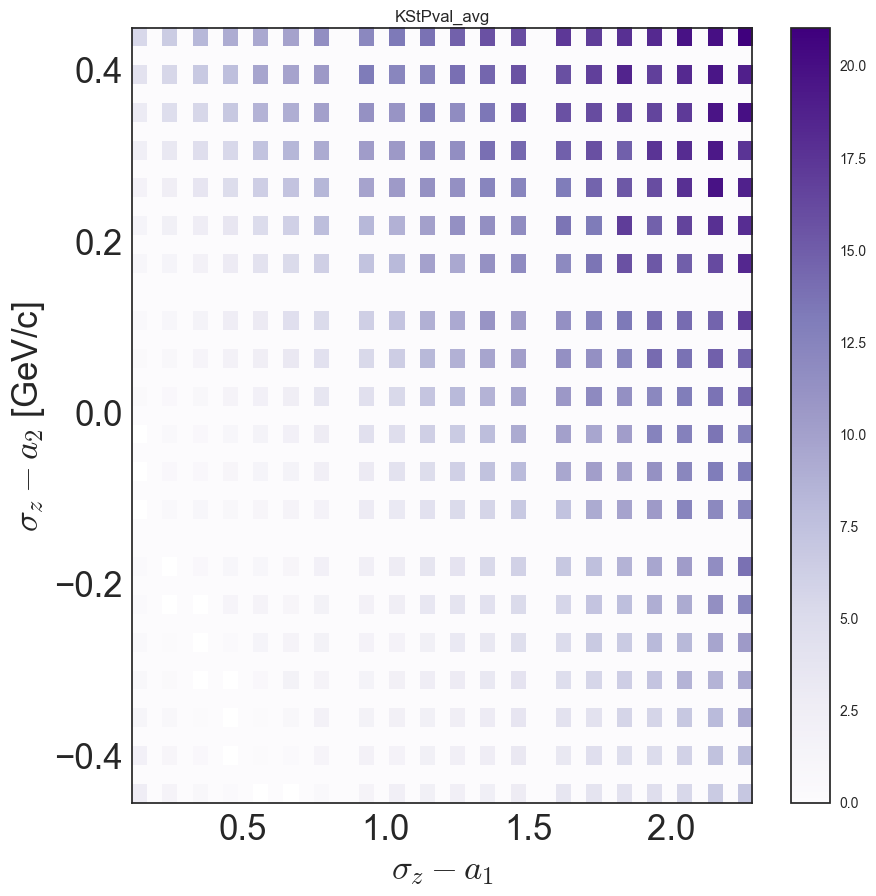

In [22]:
weights = [None , 'PvalSigmaZa1SigmaZa2' , 'PvalTotal_unweighted' , 'KStPval_avg' ]
draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

None Blues
PvalMeanZa1MeanZa2 Reds
PvalTotal_unweighted Greens
KSPval_tot Purples


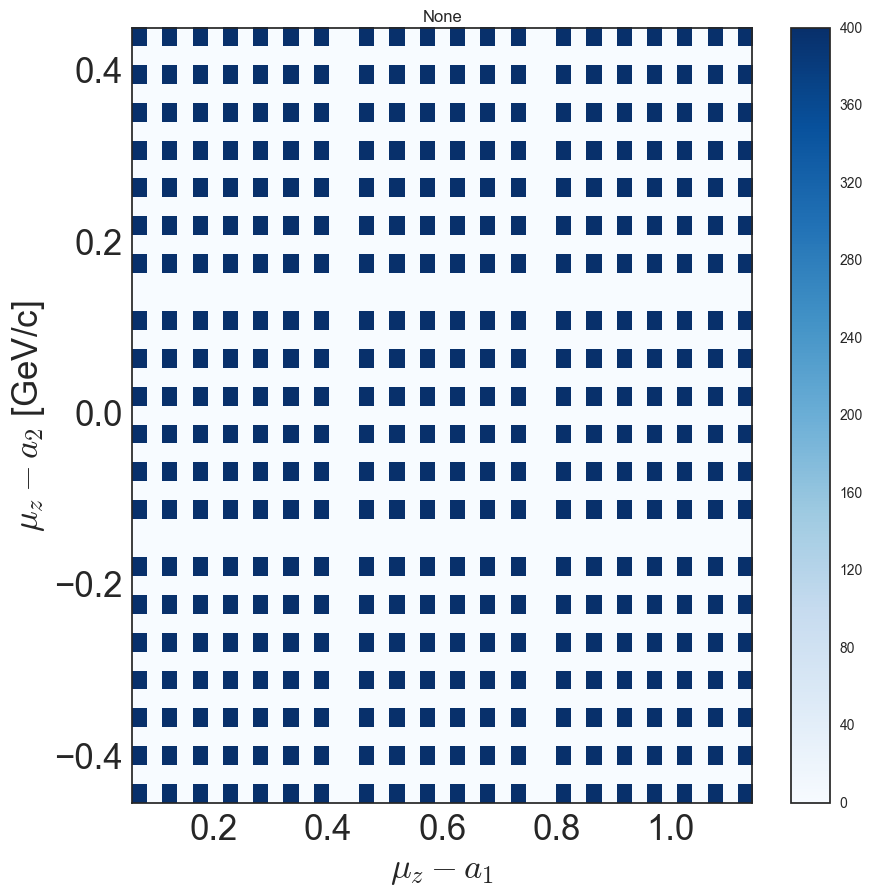

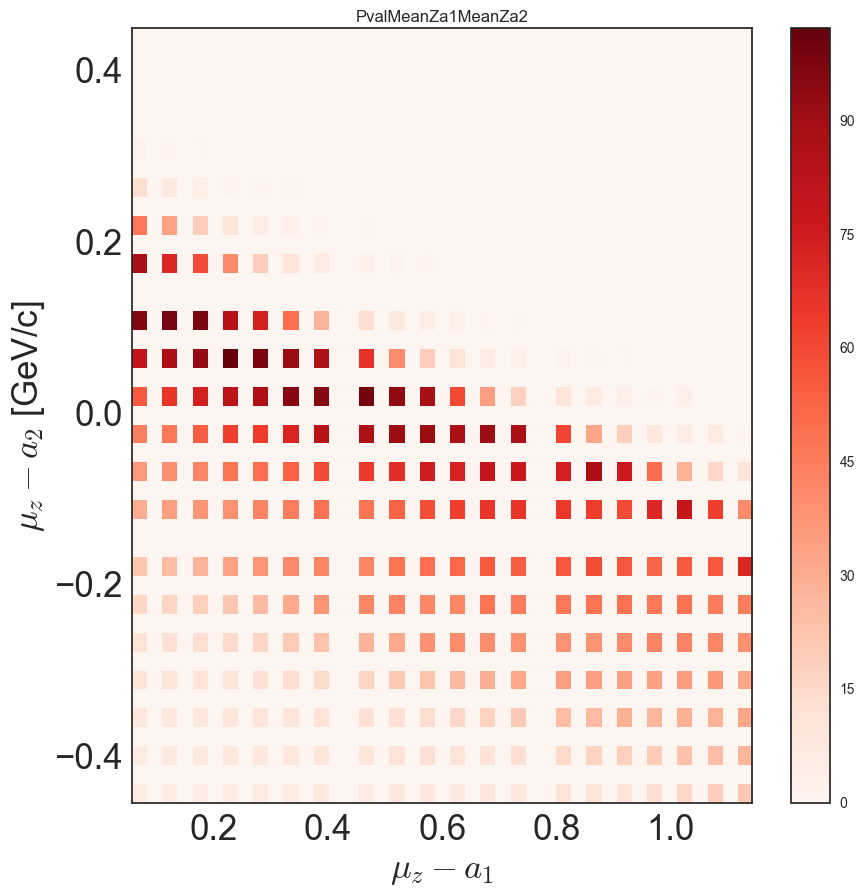

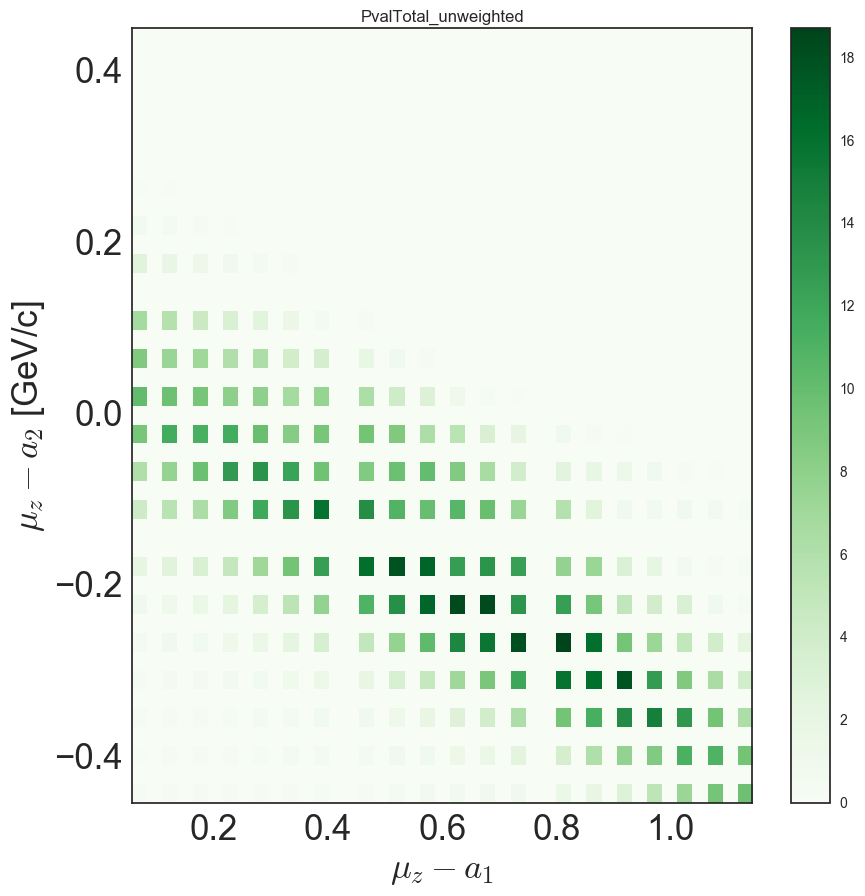

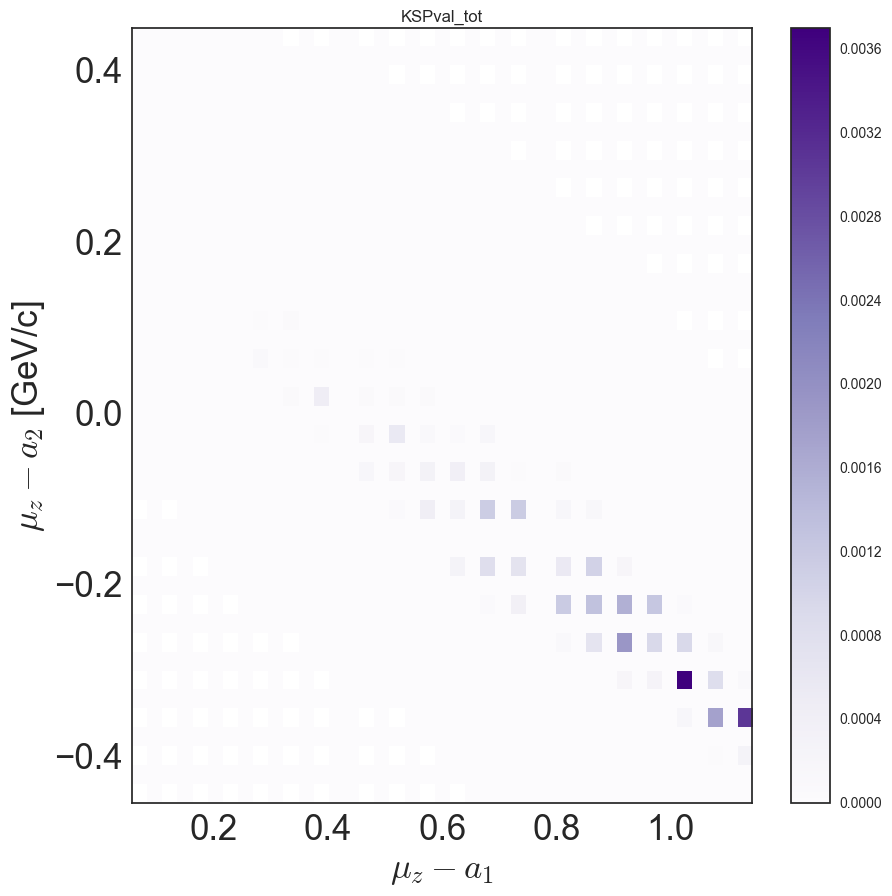

In [51]:
weights = [None , 'PvalMeanZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='MeanZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\mu_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

None Blues
PvalSigmaZa2MeanZa1 Reds
PvalTotal_unweighted Greens
KSPval_tot Purples


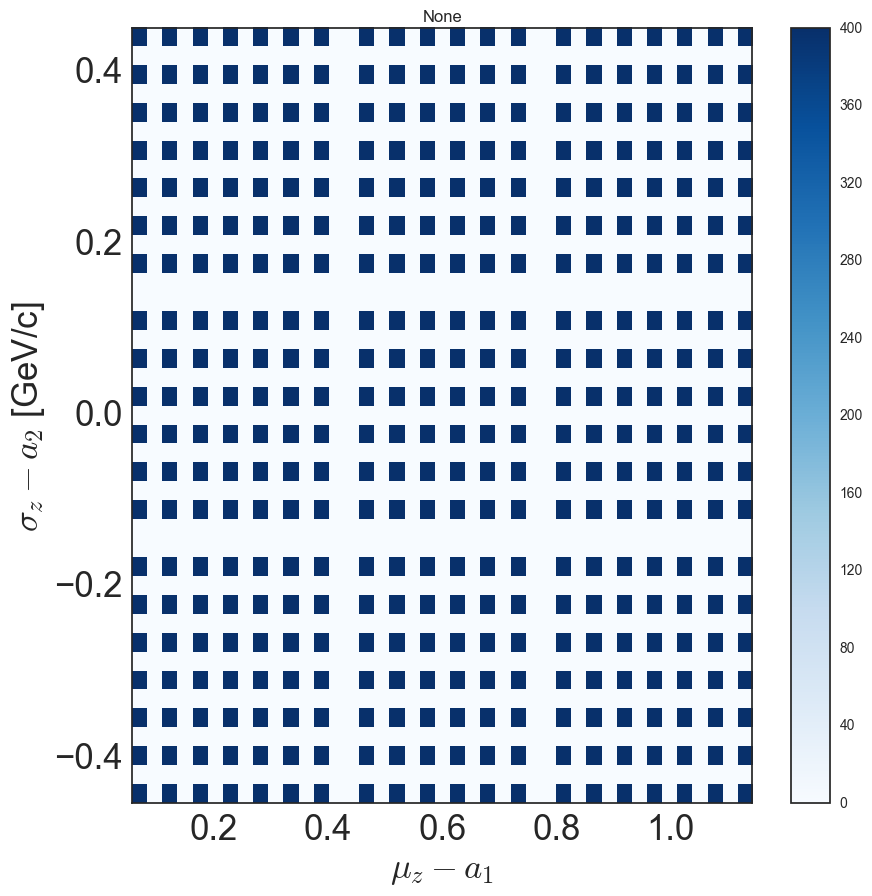

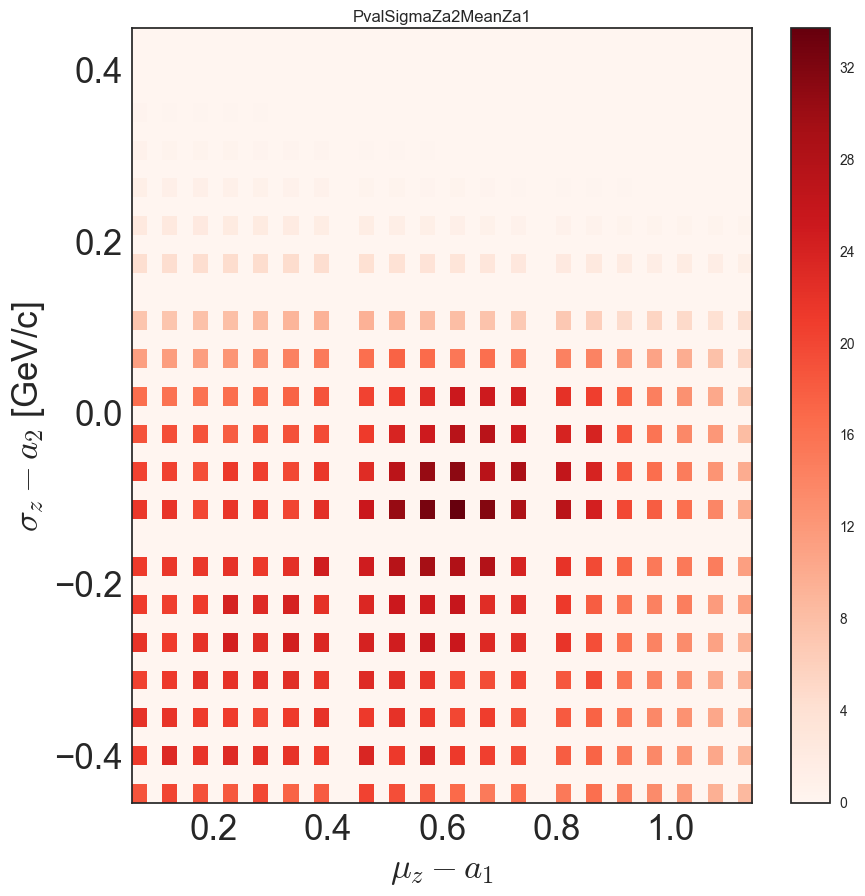

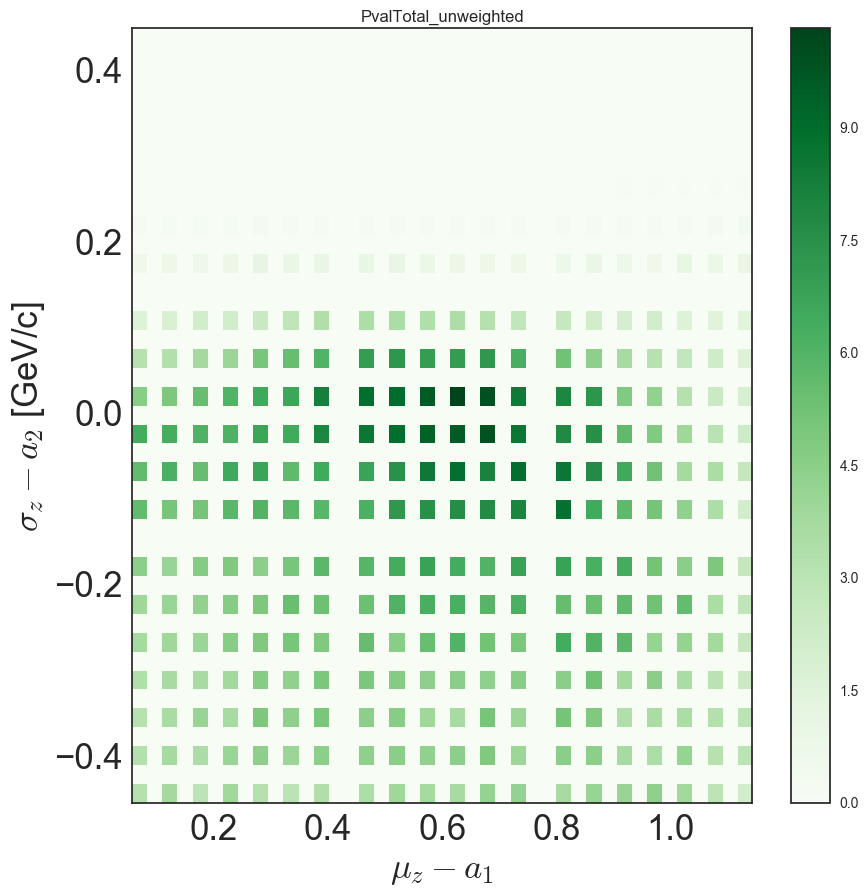

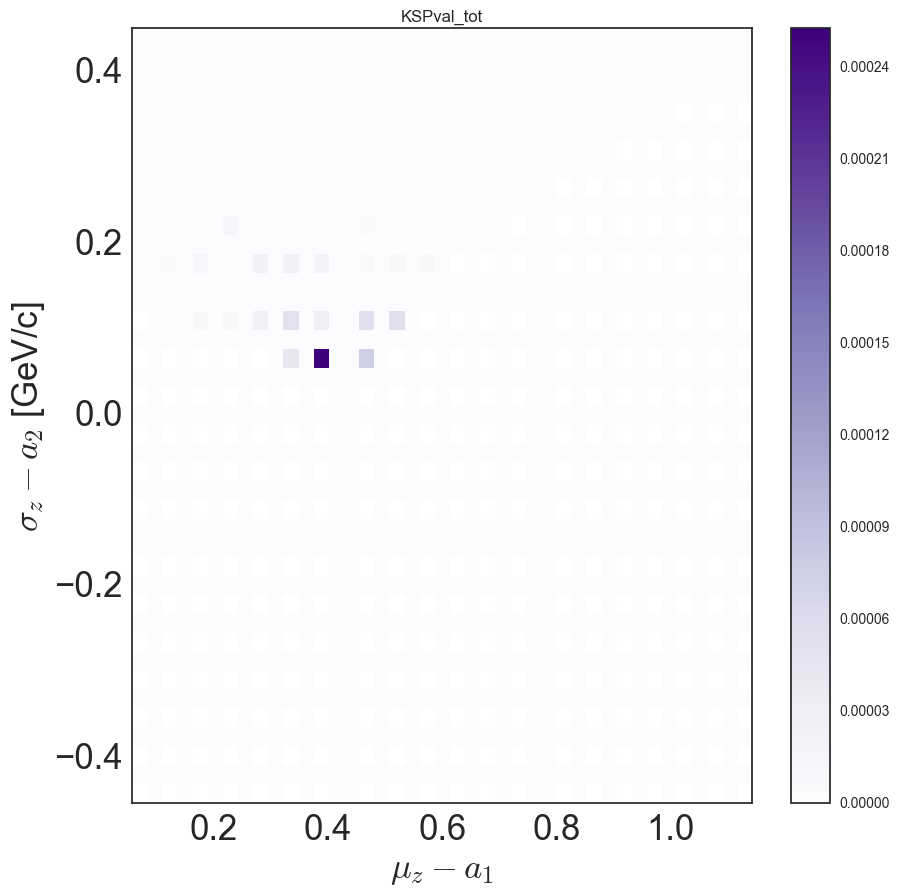

In [26]:
weights = [None , 'PvalSigmaZa2MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

None Blues
PvalSigmaZa2MeanZa2 Reds
PvalTotal_unweighted Greens
KSPval_tot Purples


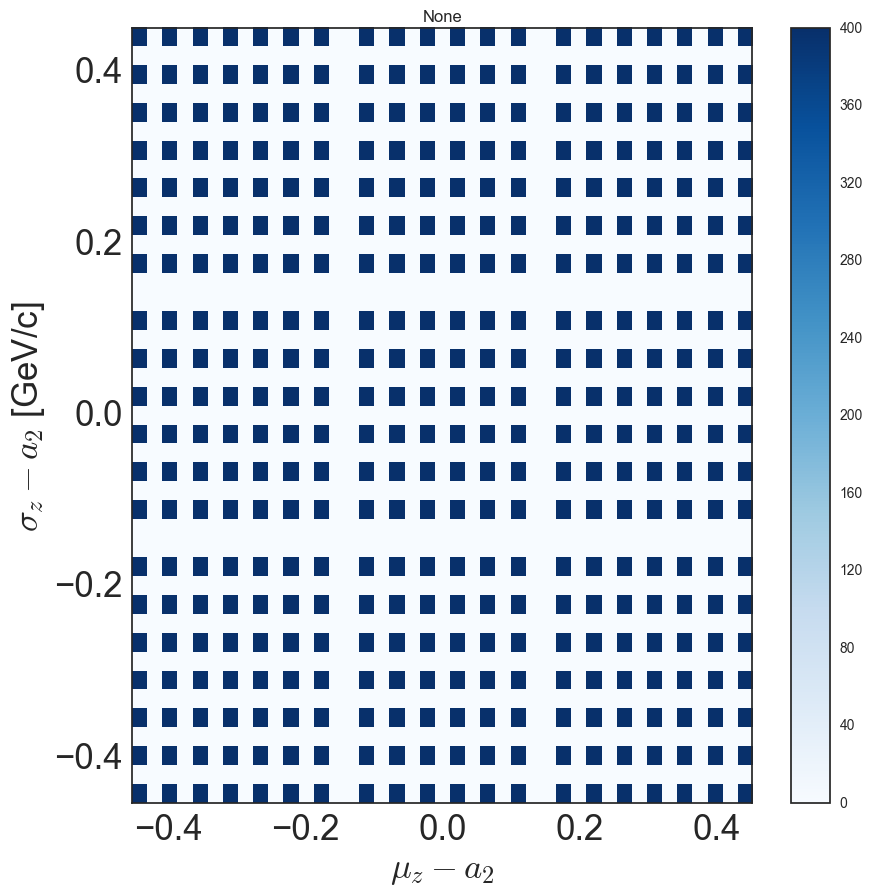

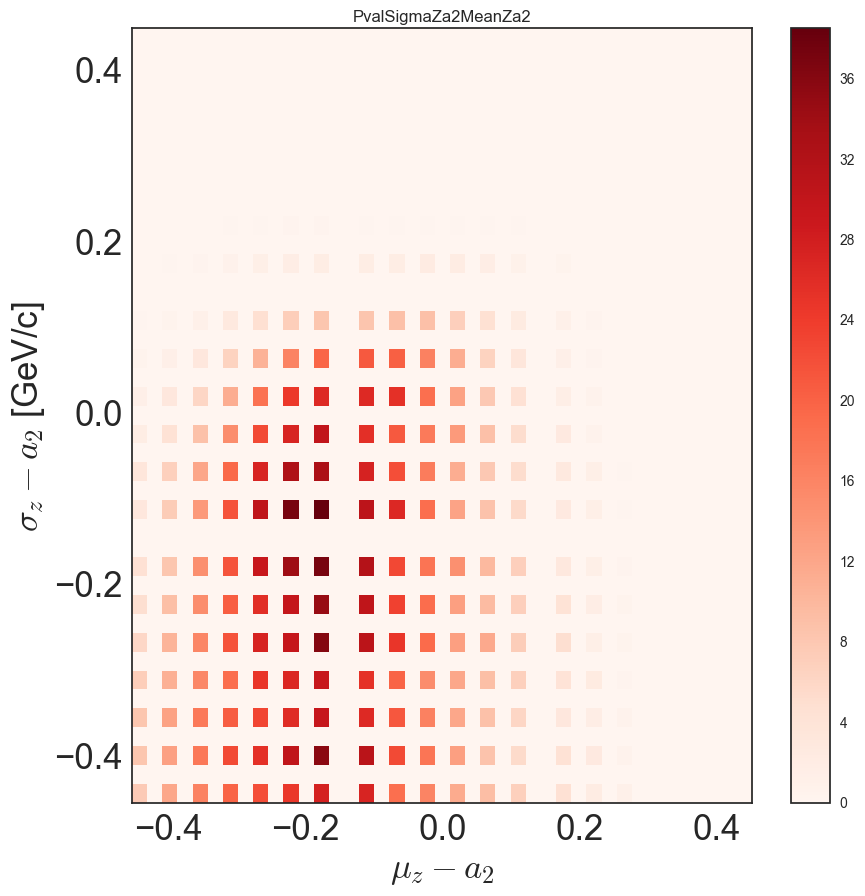

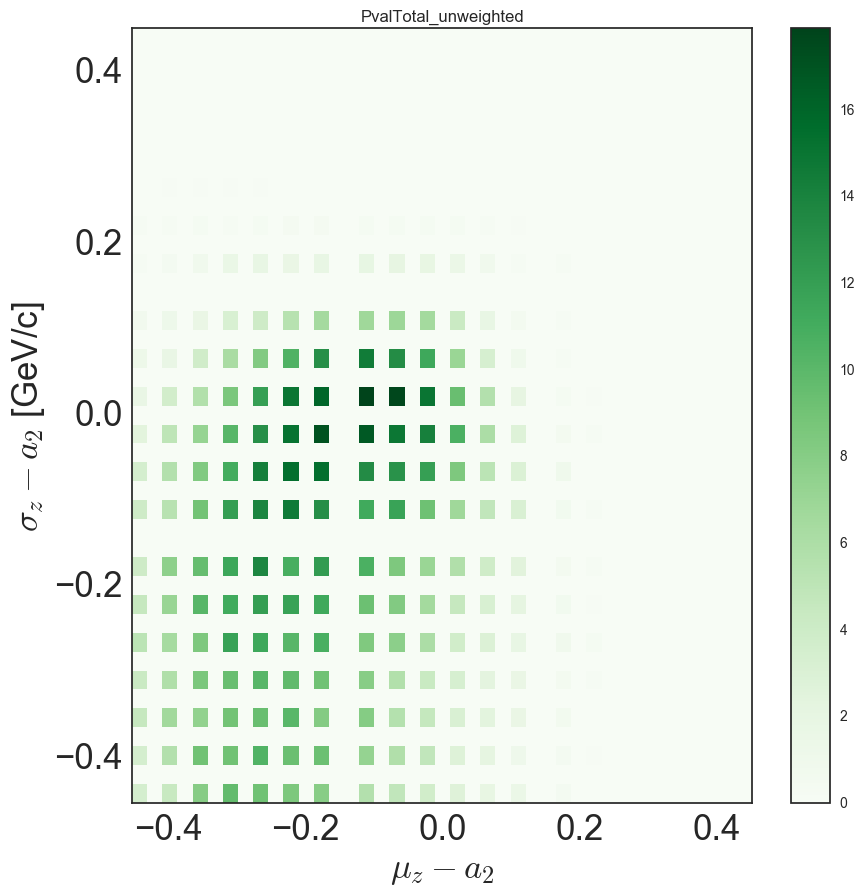

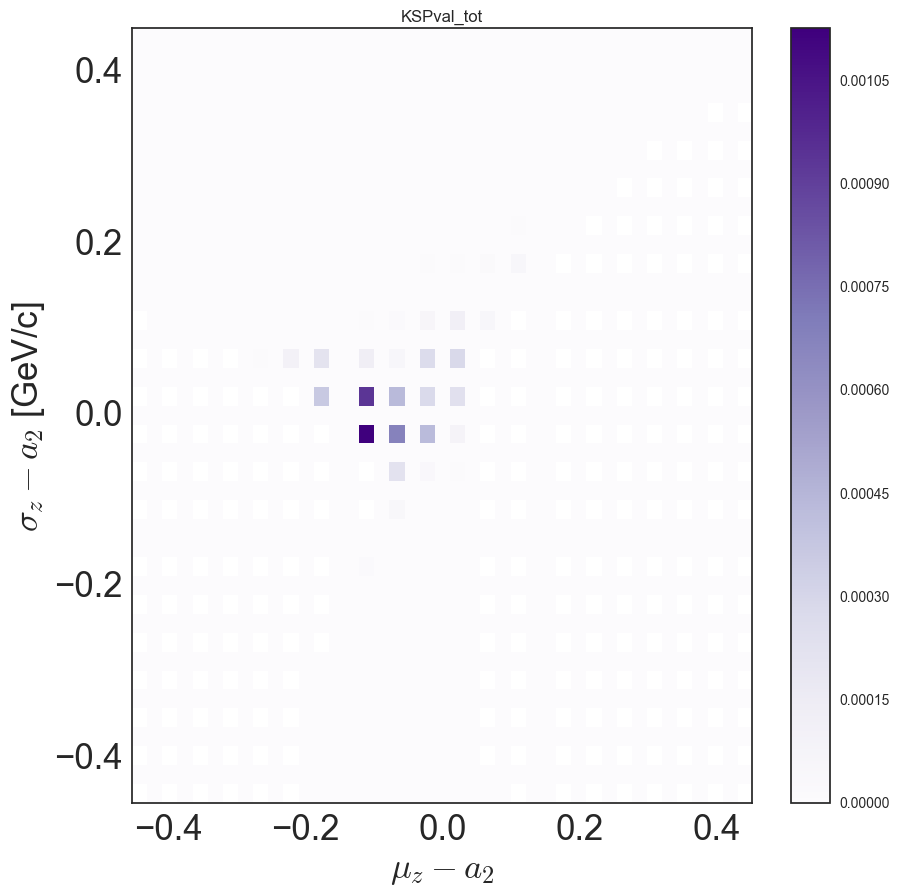

In [27]:
weights = [None , 'PvalSigmaZa2MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

None Blues
PvalSigmaZa1MeanZa1 Reds
PvalTotal_unweighted Greens
KSPval_tot Purples


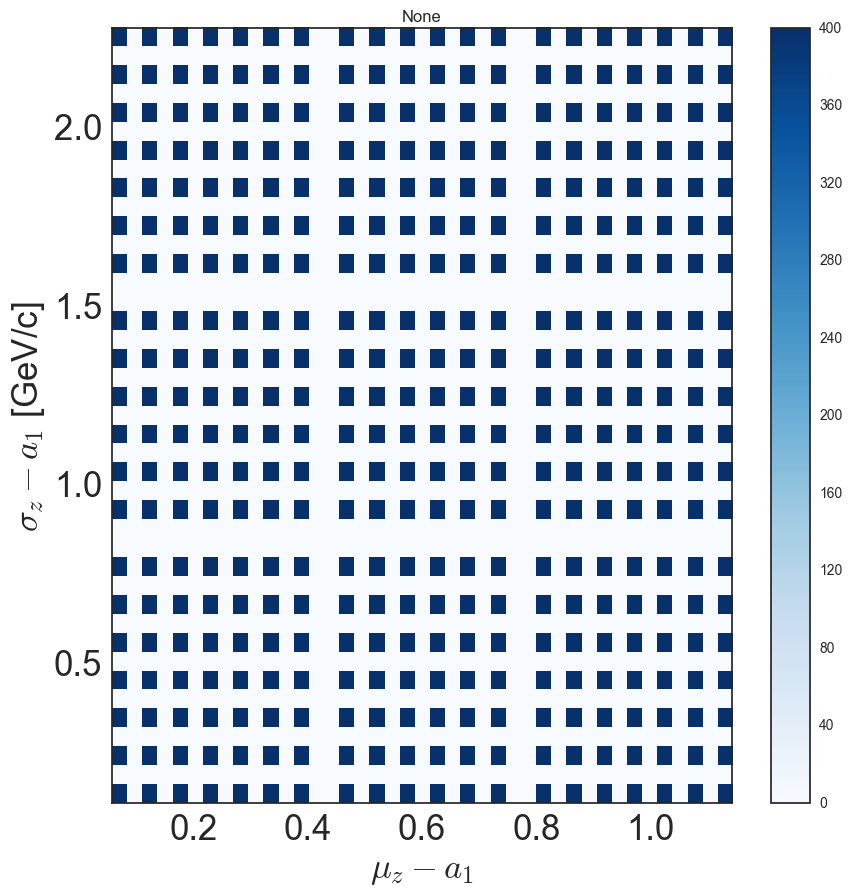

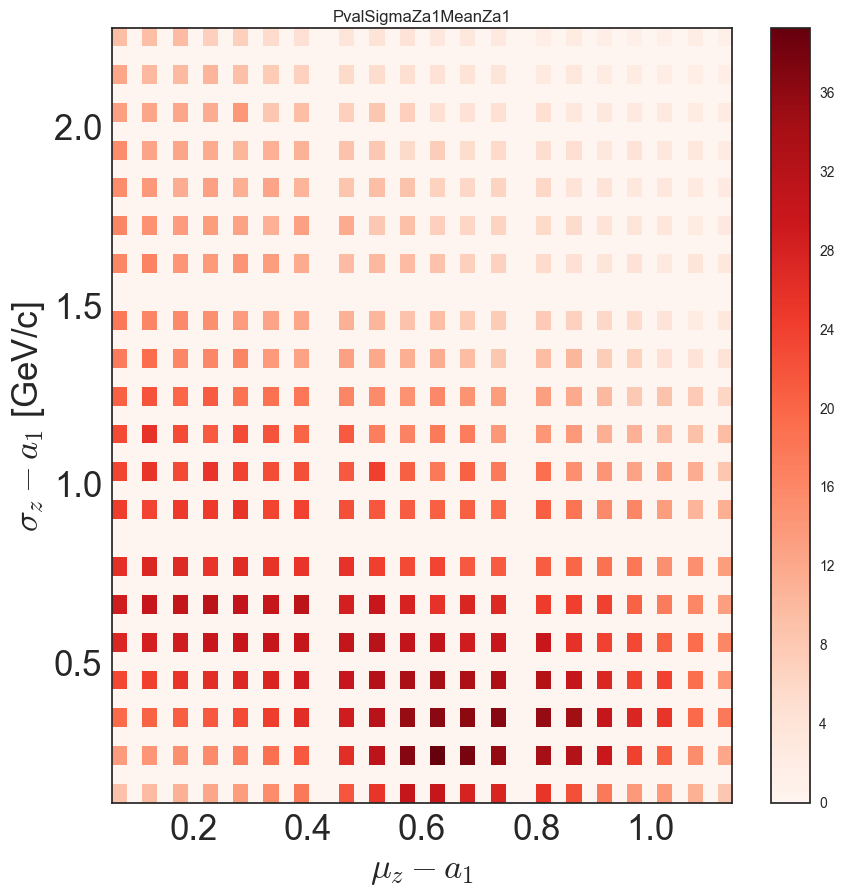

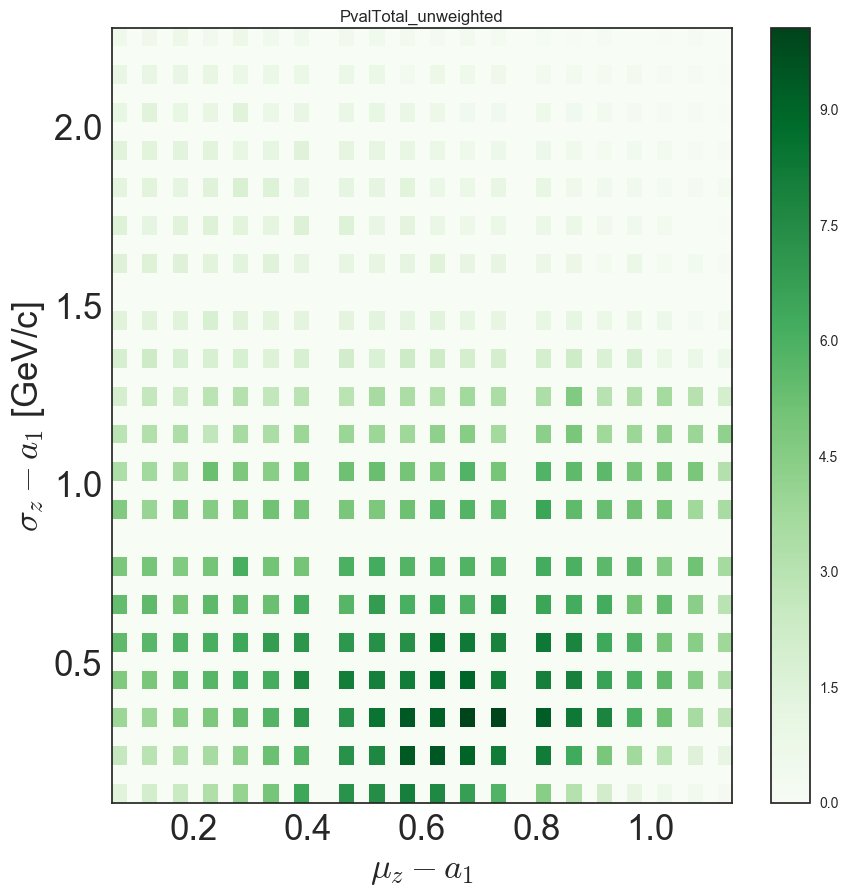

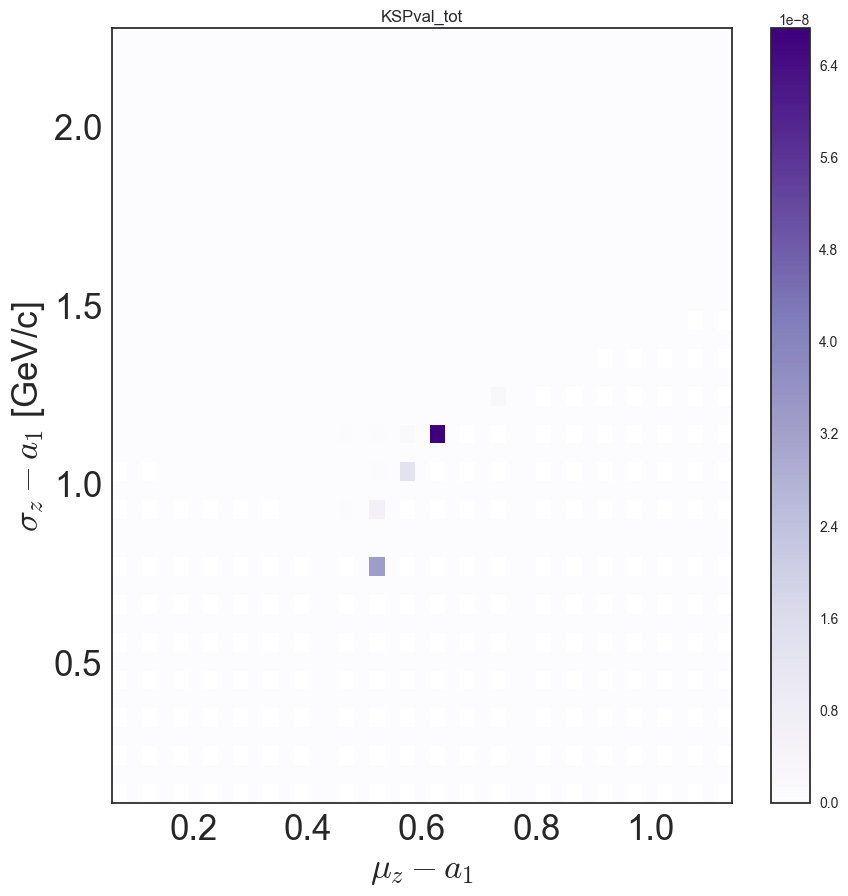

In [28]:
weights = [None , 'PvalSigmaZa1MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

None Blues
PvalSigmaZa1MeanZa2 Reds
PvalTotal_unweighted Greens
KSPval_tot Purples


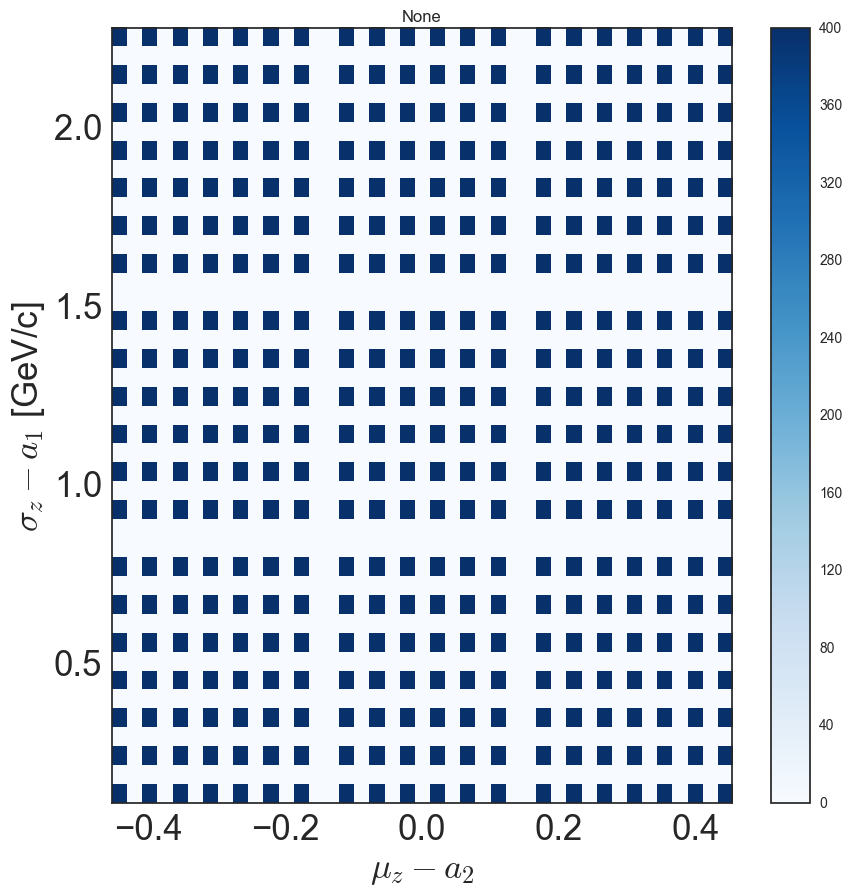

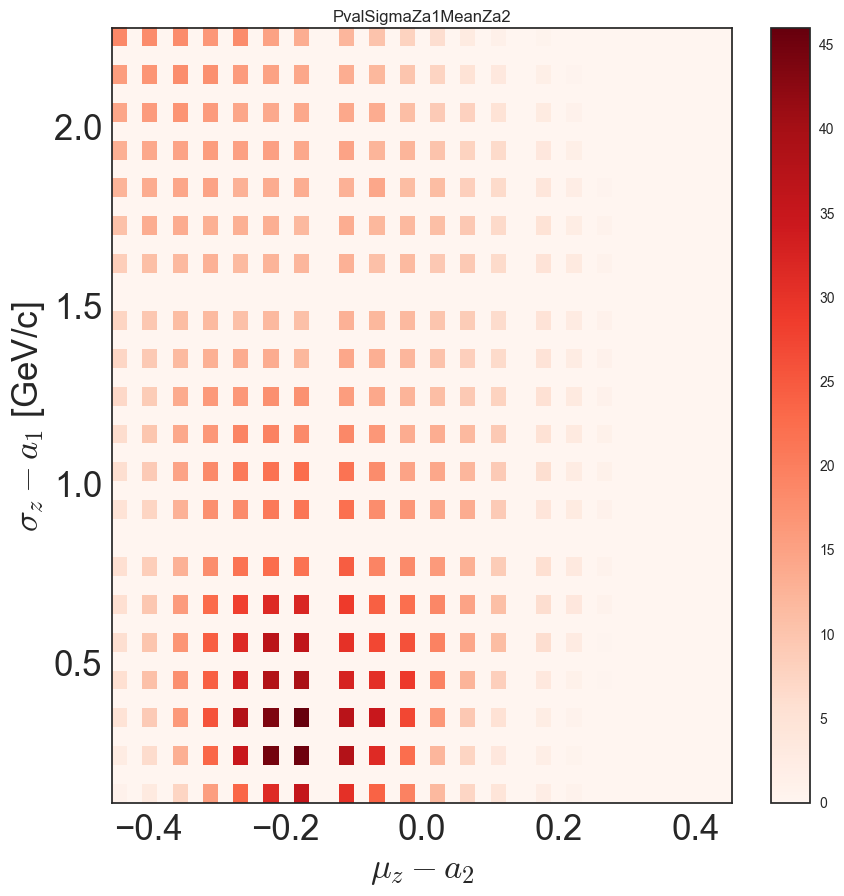

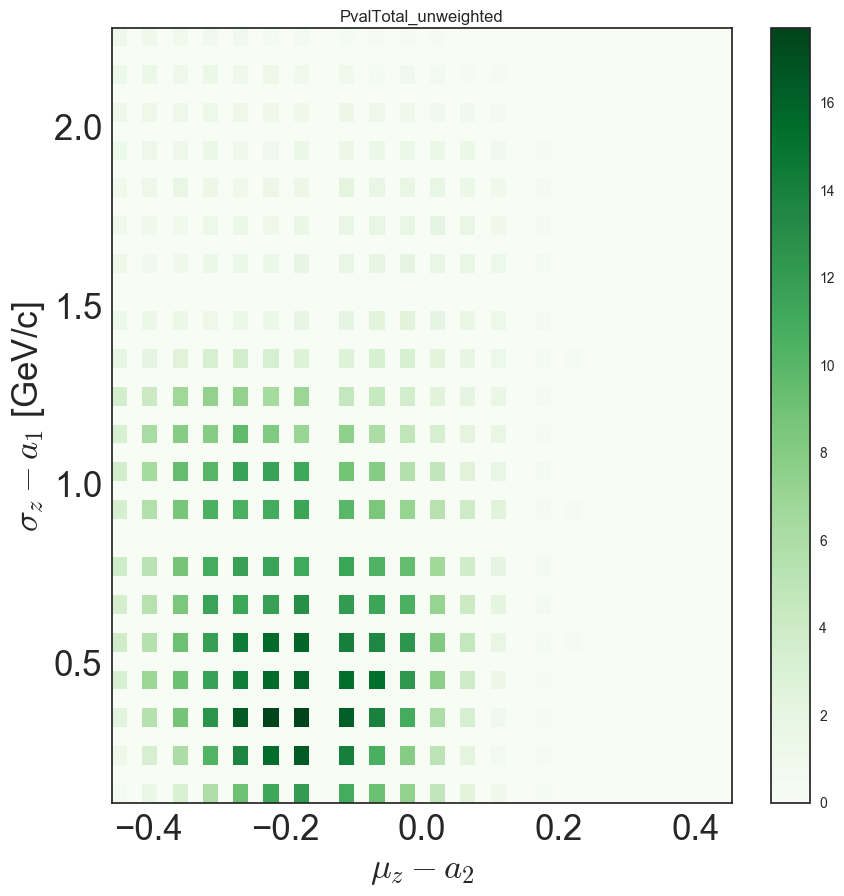

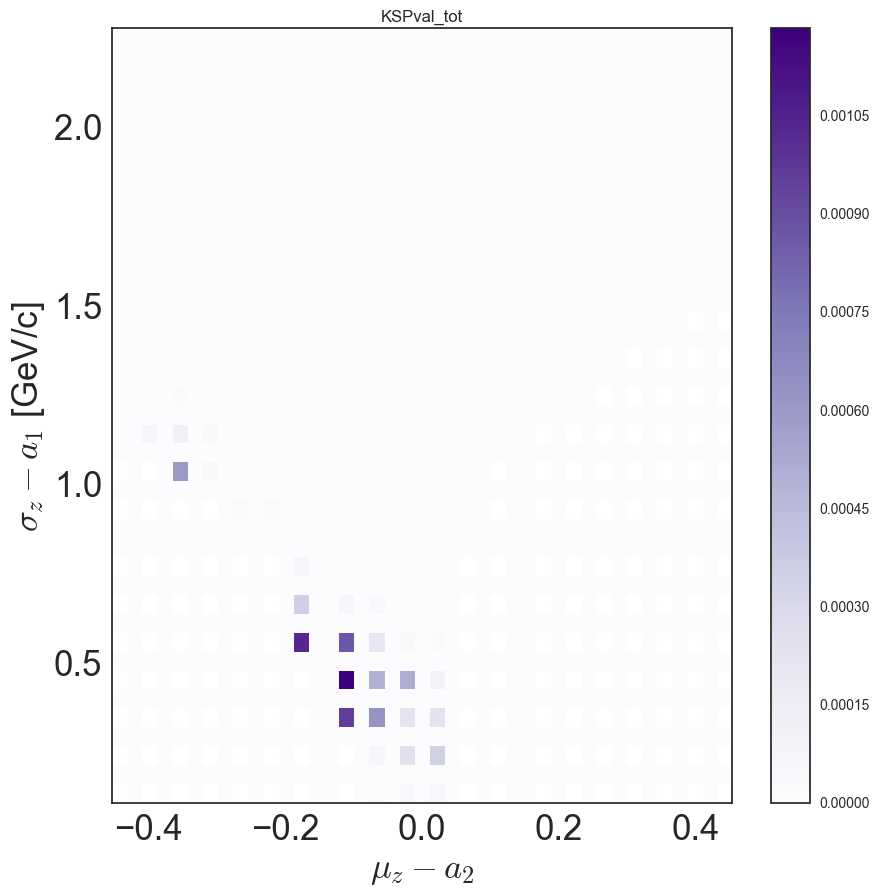

In [30]:
weights = [None , 'PvalSigmaZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);